# Sampling simulation

## Imports

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import random

import seaborn

from commpy.filters import rrcosfilter
from scipy.signal import convolve

from scipy.stats import kurtosis, moment

In [2]:
# specify the filename
INNAME = 'wfm.csv'
TRIALS = 100

# open the generated waveform as a pandas object
wave = pd.read_csv(INNAME, header=2)

In [12]:
m1 = wave['Y1'].to_numpy()
m2 = wave['Y4'].to_numpy()

# mixing coefficients
ALPHA = 4
BETA = 3

# tunable linear mixing of mixed1 and mixed2
mixed = ALPHA*m1 + BETA*m2

## Helper function

In [16]:
# gets n samples spaced with period T, starting at a random time
def sample(signal,T,n,start = None):
    a = np.arange(T*n)
    mask = a%T==0
#    print(mask)
    if (T!=1):
        mask = mask[:-T+1]
    mask = mask.astype(int)
    
    l = signal.size - T*n + T-1
    if (start==None):
        start = random.randint(0,l)
    mask1 = np.append(np.zeros(start),mask)
    mask2 = np.append(mask1,np.zeros(l-start)).astype(bool)
#     print(mask2)
    return signal[mask2]

In [18]:
# testing sample function
sample(m1,2,1)

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]


array([-0.075868])

## Collect samples

In [19]:
# get a numpy array of k sets of samples
def samples(signal,T,n,k):
    l = signal.size - T*n + T-1
    rands = np.random.randint(0,l,size=k)
    samps = np.array([sample(signal,T,n,r) for r in rands])
    return samps

## Statistics

In [20]:
# get var of the desired moment of the samples
# find the var over k sets of n samples of a signal with a time period of T
def stats(signal,T,n,k,mom):
    s = samples(signal,T,n,k)
    return np.var(moment(s,mom,axis=1))

In [10]:
# testing stats function
stats(m1,T=10,n=3,k=100,mom=2)

0.0016520458060217472

## Simulation

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454 0.231202 0.234913]
[0.23755  0.239081 0.239478 ... 0.226454

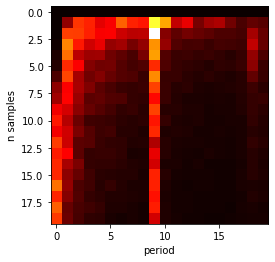

In [26]:
# collect samples and plot var for diff ns and ts for the variance of variance
NRANGE = 100
ninc = 5
TRANGE = 100
tinc = 5
SIGNAL = m1
K = 100
M = 2


a = []
for n in range(1,NRANGE,ninc):
    b = []
#     print(n)
    for t in range(1,TRANGE,tinc):
        
        b.append(stats(mixed,t,n,K,M))
    a.append(np.array(b))
a = np.array(a)
        
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.xlabel('period')
plt.ylabel('n samples')


[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984 

[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984 

[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984 

[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984 

[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984 

[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984  -0.769114 -0.754878 ... -0.789661 -0.790223 -0.786914]
[-0.77984 

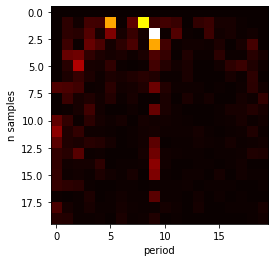

In [28]:
# collect samples and plot var for diff ns and ts for the variance of kurtosis
M = 4

a2 = []
for n in range(1,NRANGE,ninc):
    b2 = []
#     print(n)
    for t in range(1,TRANGE,tinc):

        b2.append(stats(mixed,t,n,M,mom))
    a2.append(np.array(b2))
a2 = np.array(a2)
        
plt.imshow(a2, cmap='hot', interpolation='nearest')
plt.xlabel('period')
plt.ylabel('n samples')
plt.show()

## Other code

<ipython-input-19-4627ca62d55f>:13: RuntimeWarning: invalid value encountered in true_divide
  m = m/np.linalg.norm(m)


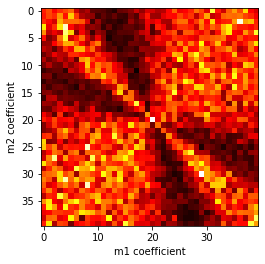

In [19]:
# LOOK AT THESE STATS OVER DIFFERENT MIXES
test_t = 100
test_n = 100
mom = 2
M = 30

a = []
for i in range(-1000,1000,50):
    b = []
#     print(i)
    for j in range(-1000,1000,50):
        m = m1*j+m2*i
        norm = np.linalg.norm(m)
        b.append(stats(m,test_t,test_n,M,mom))
    a.append(np.array(b))
a = np.array(a)

plt.imshow(a, cmap='hot', interpolation='nearest')
plt.xlabel('m1 coefficient')
plt.ylabel('m2 coefficient')
plt.show()

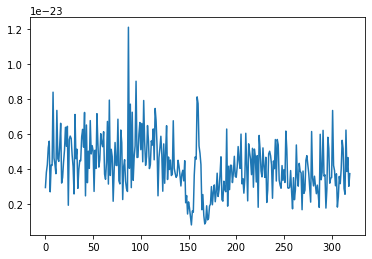

In [23]:
# graph var of kur with diff log coeffs for m2 
mom = 4

a = []
for i in range(-160,160):
#     print(i)
    m = m1+m2*(10**(i/20))
    m = m/np.linalg.norm(m)
    a.append(stats(m,test_t,test_n,M,mom))
plt.plot(a)

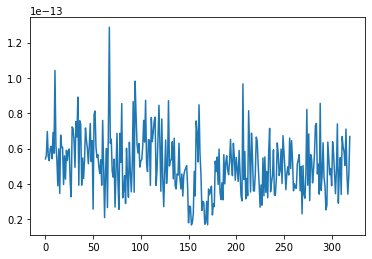

In [20]:
# graph var of var with diff log coeffs for m2 
mom = 2

a = []
for i in range(-160,160):
#     print(i)
    m = m1+m2*(10**(i/20))
    m = m/np.linalg.norm(m)
    a.append(stats(m,test_t,test_n,M,mom))
plt.plot(a)

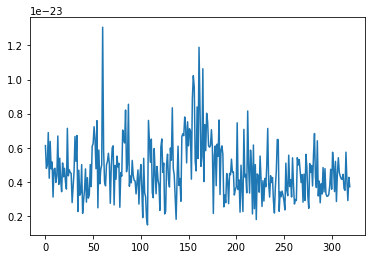

In [21]:
# graph var of kur with diff log coeffs for m2  (negative coefficients)
mom = 4

a = []
for i in range(-160,160):
#     print(i)
    m = m1-m2*(10**(i/20))
    m = m/np.linalg.norm(m)
    a.append(stats(m,test_t,test_n,M,mom))
plt.plot(a)

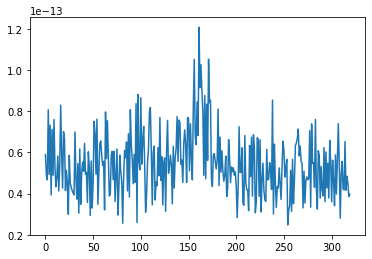

In [22]:
# graph var of var with diff log coeffs for m2 (negtative coefficients)
mom = 2

a = []
for i in range(-160,160):
#     print(i)
    m = m1-m2*(10**(i/20))
    m = m/np.linalg.norm(m)
    a.append(stats(m,test_t,test_n,M,mom))
plt.plot(a)